In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:27<00:00, 44.5MB/s]
100% 1.06G/1.06G [00:27<00:00, 41.1MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
train_DS=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_DS=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#Normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

  train_DS =train_DS.map(process)
  validation_DS = validation_DS.map(process)


In [7]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history=model.fit(train_DS,epochs=10,validation_data=validation_DS)

Epoch 1/10
625/625 [==============================] - 74s 103ms/step - loss: 1.3889 - accuracy: 0.5742 - val_loss: 0.6303 - val_accuracy: 0.6250
Epoch 2/10
625/625 [==============================] - 66s 104ms/step - loss: 0.5851 - accuracy: 0.6924 - val_loss: 0.5321 - val_accuracy: 0.7208
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5047 - accuracy: 0.7557 - val_loss: 0.5638 - val_accuracy: 0.7408
Epoch 4/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4342 - accuracy: 0.7966 - val_loss: 0.5270 - val_accuracy: 0.7726
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3758 - accuracy: 0.8327 - val_loss: 0.4645 - val_accuracy: 0.7920
Epoch 6/10
625/625 [==============================] - 66s 104ms/step - loss: 0.3089 - accuracy: 0.8661 - val_loss: 0.4152 - val_accuracy: 0.8202
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2482 - accuracy: 0.8970 - val_loss: 0.5304 - val_ac

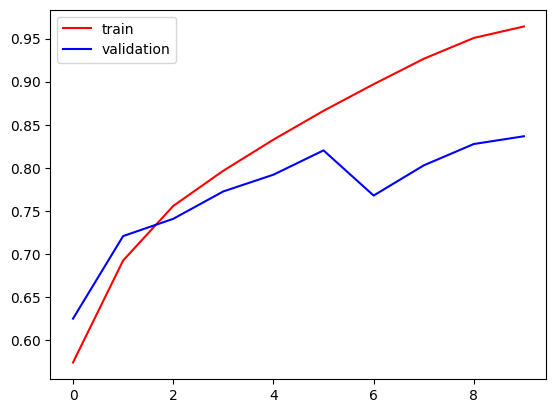

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

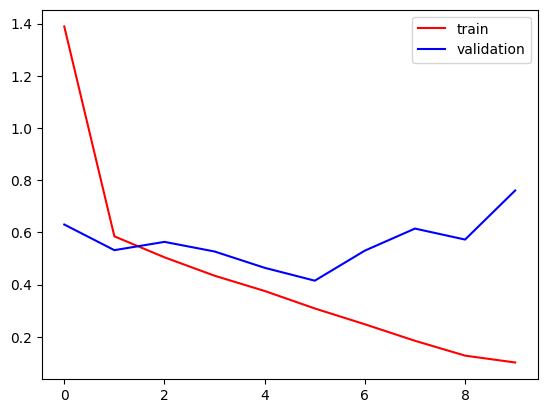

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [13]:
import cv2


In [14]:
test_img=cv2.imread('/content/Dog.jpg')

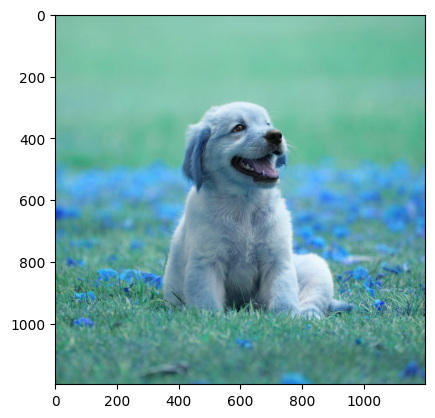

In [15]:
plt.imshow(test_img)

In [16]:
test_img.shape

(1197, 1200, 3)

In [17]:
test_img=cv2.resize(test_img,(256,256))

In [18]:
test_input=test_img.reshape((1,256,256,3))

In [19]:
model.predict(test_input)

1/1 [==============================] - 0s 399ms/step


array([[0.9907855]], dtype=float32)

In [20]:


# Assuming 'model' is your trained TensorFlow model
model.save('saved_model')  # Save the model in SavedModel format

# If you want to convert the SavedModel to .pb format
tf.saved_model.save(model, 'saved_model_pb')
